In [2]:
!pip install missingno

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df_gs = pd.read_csv('C:/gong_test/송파구.csv', encoding='euc-kr')

In [118]:
df_gs.head()

,Unnamed: 0,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름
0,0,0.000000,0.000000,0.588901,0.000000,0.000000,0.0,송파나루
1,1,0.000000,0.428571,1.000000,0.235294,0.238095,0.5,잠 실
2,2,0.000000,0.464286,0.017245,0.117647,0.357143,0.0,삼 전1
3,3,0.666667,0.392857,0.588901,0.117647,0.345238,0.0,송 파
4,4,0.333333,0.500000,0.521730,0.117647,0.297619,0.0,방 이


In [119]:
df_gs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [120]:
df_gs.head()

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관,공원이름
0,0.000000,0.000000,0.588901,0.000000,0.000000,0.0,송파나루
1,0.000000,0.428571,1.000000,0.235294,0.238095,0.5,잠 실
2,0.000000,0.464286,0.017245,0.117647,0.357143,0.0,삼 전1
3,0.666667,0.392857,0.588901,0.117647,0.345238,0.0,송 파
4,0.333333,0.500000,0.521730,0.117647,0.297619,0.0,방 이


In [121]:
from sklearn.decomposition import PCA

In [122]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df_gs.drop(['공원이름'], axis=1).values# 독립변인들의 value값만 추출
y = df_gs['공원이름'].values # 종속변인 추출
x = StandardScaler().fit_transform(x)
features=['지하철역수','버스정류장수','유동인구비율','복지시설','의료기관','도서관']
pd.DataFrame(x, columns=features).head()

,지하철역수,버스정류장수,유동인구비율,복지시설,의료기관,도서관
0,-0.998541,-2.710471,0.770598,-1.593912,-1.593990,-0.645942
1,-0.998541,-0.313476,2.248912,-0.166684,0.036295,1.365287
2,-0.998541,-0.113726,-1.285084,-0.880298,0.851437,-0.645942
3,1.401461,-0.513225,0.770598,-0.880298,0.769923,-0.645942
4,0.201460,0.086024,0.529047,-0.880298,0.443866,-0.645942


In [123]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [124]:
principalDf.head()

,principal component1,principal component2
0,-2.269807,-2.831028
1,-0.334891,0.061898
2,-0.179939,-0.554573
3,-1.830461,1.020858
4,-1.071722,0.319729


In [125]:
pca.explained_variance_ratio_

array([0.29922506, 0.25352573])

In [126]:
sum(pca.explained_variance_ratio_)

0.5527507823218012

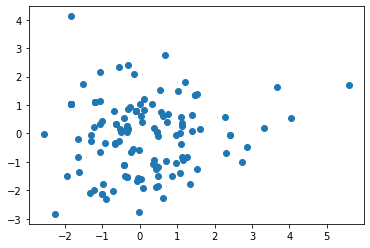

In [127]:
plt.scatter(principalDf["principal component1"],principalDf["principal component2"])

In [128]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [129]:
%matplotlib inline

In [131]:
from sklearn.mixture import GaussianMixture

In [132]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(x)

In [136]:
principalDf['gmm_cluster'] = gmm_labels

In [137]:
principalDf

,principal component1,principal component2,gmm_cluster
0,-2.269807,-2.831028,2
1,-0.334891,0.061898,1
2,-0.179939,-0.554573,2
3,-1.830461,1.020858,1
4,-1.071722,0.319729,1
...,...,...,...
132,1.219703,1.818238,2
133,0.385544,-0.928807,2
134,-0.025779,-0.599105,1
135,2.406357,-0.056300,0


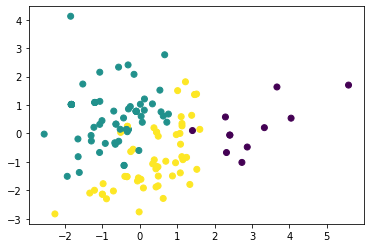

In [138]:
plt.scatter(principalDf["principal component1"],principalDf["principal component2"],c=gmm_labels)

In [139]:
principalDf.to_csv('C:/gong_test/gmm_sp.csv',encoding='euc-kr')